<div style="background-color:#173267;">
    <br>
    <img src="uclogo.png" style="align:center;width:20%;">
    <p style="text-align:center;font-family:Trebuchet MS;color:white;font-size:40pt;font-weight:bold;margin:50px">
        AYUDANTÍA 2
    </p>
    <p style="text-align:center;font-family:Trebuchet MS;color:white;font-size:20pt;font-weight:bold;margin:50px">
        Introducción a la Ciencia de Datos
    </p>
    <p style="text-align:center;font-family:Trebuchet MS;color:white;font-size:12pt;">
        Felipe Gutiérrez - figutier@uc.cl
        Nicolas Mendicoa - nicolasmendicoa@uc.cl
    </p>
    <p style="text-align:center;font-family:Trebuchet MS;color:white;font-size:12pt;">        
        Basado en notebook de:
        Vicente Agüero - vicenteaguero@uc.cl
        <br>23 de Agosto 2022
    </p>
    <br><br>
</div>

<p style="text-align:center;font-family:Trebuchet MS;color:#173267;font-size:20pt;font-weight:bold;">
    Preliminares
</p>

In [1]:
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import json



<p style="text-align:center;font-family:Trebuchet MS;color:#173267;font-size:20pt;font-weight:bold;">
    Leer archivos CSV
</p>

<p style="text-align:justify;font-family:Trebuchet MS;color:#173267;font-size:15pt;font-weight:normal;">
    <b>Ejercicio:</b> Leer el archivo <code>pokémon.csv</code> en la carpeta <code>files</code> de manera correcta.
</p>

In [2]:
# sep o delimiter
pokemon = pd.read_csv('files/pokémon.csv', sep=';', index_col='Name')
pokemon

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [3]:
pokemon.loc[(pokemon['Attack'] == 100) & (pokemon['Legendary'] == False), ['Type 1', 'Attack']]

,Type 1,Attack
Name,,
VenusaurMega Venusaur,Grass,100
Sandslash,Ground,100
Machoke,Fighting,100
Rapidash,Fire,100
Tauros,Normal,100
Mew,Psychic,100
Sudowoodo,Rock,100
Piloswine,Ice,100
Celebi,Psychic,100


<p style="text-align:center;font-family:Trebuchet MS;color:#173267;font-size:20pt;font-weight:bold;">
    Leer archivos EXCEL
</p>

<p style="text-align:justify;font-family:Trebuchet MS;color:#173267;font-size:15pt;font-weight:normal;">
    <b>Ejercicio:</b> Leer página <code>ARK Fintech</code> del archivo <code>fintech.xlsx</code> en la carpeta <code>files</code> de manera correcta.
</p>

In [4]:
fintech = pd.read_excel('files/fintech.xlsx',
                        sheet_name='ARK Fintech',
                        names=['FECHA', 'PRECIO DE APERTURA', 'VALOR MÁS ALTO', 'VALOR MÁS BAJO',
                               'PRECIO DE CIERRE', 'PRECIO DE CIERRE AJUSTADO', 'VOLUMEN'],
                        index_col='FECHA')
fintech

,PRECIO DE APERTURA,VALOR MÁS ALTO,VALOR MÁS BAJO,PRECIO DE CIERRE,PRECIO DE CIERRE AJUSTADO,VOLUMEN
FECHA,,,,,,
2019-02-04,20.160000,20.400000,20.157000,20.400000,20.073683,47200
2019-02-05,20.480000,20.610001,20.430000,20.533001,20.204557,110700
2019-02-06,20.520000,20.534000,20.309999,20.469999,20.142563,45300
2019-02-07,20.290001,20.320000,20.000000,20.170000,19.847363,58200
2019-02-08,20.000000,20.209999,19.950001,20.190001,19.867043,18900
...,...,...,...,...,...,...
2021-06-28,54.000000,54.599998,54.000000,54.540001,54.540001,1653300
2021-06-29,54.410000,54.820000,54.200001,54.779999,54.779999,889200
2021-06-30,54.529999,54.529999,53.985001,54.110001,54.110001,1058800


In [5]:
fintech.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 609 entries, 2019-02-04 to 2021-07-02
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRECIO DE APERTURA         609 non-null    float64
 1   VALOR MÁS ALTO             609 non-null    float64
 2   VALOR MÁS BAJO             609 non-null    float64
 3   PRECIO DE CIERRE           609 non-null    float64
 4   PRECIO DE CIERRE AJUSTADO  609 non-null    float64
 5   VOLUMEN                    609 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.3 KB


In [6]:
fintech.describe()

,PRECIO DE APERTURA,VALOR MÁS ALTO,VALOR MÁS BAJO,PRECIO DE CIERRE,PRECIO DE CIERRE AJUSTADO,VOLUMEN
count,609.000000,609.000000,609.000000,609.000000,609.000000,6.090000e+02
mean,33.103039,33.402905,32.726053,33.101128,32.917930,6.806186e+05
std,12.779421,12.926270,12.524099,12.749568,12.854312,1.268689e+06
min,17.820000,18.120001,16.940001,17.760000,17.693396,3.300000e+03
25%,22.180000,22.320000,22.039000,22.143999,21.789785,1.920000e+04
50%,25.850000,26.063999,25.570000,25.799999,25.703243,9.290000e+04
75%,45.139999,45.700001,44.556999,45.250000,45.080299,8.262000e+05
max,63.759998,64.489998,63.064999,63.599998,63.599998,1.062010e+07


<p style="text-align:center;font-family:Trebuchet MS;color:#173267;font-size:20pt;font-weight:bold;">
    Leer archivos HTML
</p>

<p style="text-align:justify;font-family:Trebuchet MS;color:#173267;font-size:15pt;font-weight:normal;">
    <b>Ejercicio:</b> Leer tabla del medallero olímpico Tokyo 2020 desde <a href="https://es.wikipedia.org/wiki/Juegos_Ol%C3%ADmpicos_de_Tokio_2020" style="text-decoration:none;font-weight:bold">Wikipedia</a> de manera correcta.
</p>

In [7]:
olimpicos = pd.read_html('http://es.wikipedia.org/wiki/Juegos_Ol%C3%ADmpicos_de_Tokio_2020',
                         match='Estados Unidos')[1]
olimpicos.columns = ['Ránking', 'País', 'Oro', 'Plata', 'Bronce', 'Total']
olimpicos.rename({'País': 'Country'}, axis=1, inplace=True)
olimpicos.set_index('Ránking', inplace=True)
olimpicos = olimpicos.astype({'Country': str, 'Oro': int, 'Plata': float, 'Total': 'int64'})
olimpicos

,Country,Oro,Plata,Bronce,Total
Ránking,,,,,
1,Estados Unidos (USA),39,41.0,33,113
2,China (CHN),38,32.0,19,89
3,Japón (JPN),27,14.0,17,58
4,Reino Unido (GBR),22,20.0,22,64
5,ROC (ROC),20,28.0,23,71
6,Australia (AUS),17,7.0,22,46
7,Países Bajos (NED),10,12.0,14,36
8,Francia (FRA),10,12.0,11,33
9,Alemania (GER),10,11.0,16,37


<p style="text-align:center;font-family:Trebuchet MS;color:#173267;font-size:20pt;font-weight:bold;">
    Otros formatos
</p>

<p style="text-align:justify;font-family:Trebuchet MS;color:#173267;font-size:15pt;font-weight:normal;">
    <b>Ejercicio:</b> Guardar los archivos que hemos creado.
</p>

In [8]:
# Comma Separated Values
pokemon.to_csv('files/pokémon-v2.csv')

In [9]:
# Parquet
fintech.to_parquet('files/fintech.parquet')

In [10]:
# Pickle
olimpicos.to_pickle('files/olimpicos.pkl')

<p style="text-align:center;font-family:Trebuchet MS;color:#173267;font-size:20pt;font-weight:bold;">
    JSON
</p>

<p style="text-align:justify;font-family:Trebuchet MS;color:#173267;font-size:15pt;font-weight:normal;">
    <b>Ejercicio:</b> Serializar y deserializar.
</p>

In [11]:
example = {
    'Personas': {
        'Felipe': {
            'Apellido': 'Gutiérrez',
            'Rol': 'Ayudante'
        },
        'Nicolas': {
            'Apellido': 'Mendicoa',
            'Rol': 'Ayudante'
        },
        
        'Paula': {
            'Apellido': 'Aguirre',
            'Rol': 'Profesora'
        }
    }
}

In [12]:
type(example)

dict

In [13]:
example

{'Personas': {'Felipe': {'Apellido': 'Gutiérrez', 'Rol': 'Ayudante'},
  'Nicolas': {'Apellido': 'Mendicoa', 'Rol': 'Ayudante'},
  'Paula': {'Apellido': 'Aguirre', 'Rol': 'Profesora'}}}

In [14]:
json.dumps(example)

'{"Personas": {"Felipe": {"Apellido": "Guti\\u00e9rrez", "Rol": "Ayudante"}, "Nicolas": {"Apellido": "Mendicoa", "Rol": "Ayudante"}, "Paula": {"Apellido": "Aguirre", "Rol": "Profesora"}}}'

In [15]:
type(json.dumps(example))

str

In [16]:
with open('files/example.json', 'w') as archivo:
    json.dump(example, archivo, indent=4)

In [17]:
with open('files/example.json', 'r') as archivo:
    datos = json.load(archivo)

In [18]:
datos

{'Personas': {'Felipe': {'Apellido': 'Gutiérrez', 'Rol': 'Ayudante'},
  'Nicolas': {'Apellido': 'Mendicoa', 'Rol': 'Ayudante'},
  'Paula': {'Apellido': 'Aguirre', 'Rol': 'Profesora'}}}

<p style="text-align:center;font-family:Trebuchet MS;color:#173267;font-size:20pt;font-weight:bold;">
    GeoPandas
</p>

<p style="text-align:justify;font-family:Trebuchet MS;color:#173267;font-size:15pt;font-weight:normal;">
    <b>Ejercicio:</b> Hacer un buen plot de un mapa.
</p>

In [19]:
aeropuertos = gpd.read_file('files/aeropuertos/aeropuertos.shp')
aeropuertos

,objectid_1,cod_comuna,categoría,cod_oaci,cod_iata,Aerodromo,Region,Provincia,Comuna,geometry
0,39,3201.0,Aeródromo,SCRA,CNR,Aeródromo Chañaral,Región de Atacama,Chañaral,Chañaral,POINT (-7860125.240 -3040341.337)
1,11,11302.0,Aeródromo,SCEY,None,Aeródromo Entrada Mayer,Región de Aysén del Gral.Ibañez del Campo,Capitán Prat,O'Higgins,POINT (-8051540.445 -6140363.715)
2,714,12302.0,Aeródromo,SCSB,SMB,Aeródromo Franco Bianco,Región de Magallanes y Antártica Chilena,Tierra del Fuego,Primavera,POINT (-7717217.155 -6934335.671)
3,191,7404.0,Aeródromo,SCEO,None,Aeródromo El Salto,Región del Maule,Linares,Parral,POINT (-7999265.318 -4318434.688)
4,554,4301.0,Aeródromo,SCAD,None,Aeródromo Santa Adriana,Región de Coquimbo,Limarí,Ovalle,POINT (-7934471.154 -3584815.859)
...,...,...,...,...,...,...,...,...,...,...
313,536,5104.0,Aeródromo,SCIR,None,Aeródromo Robinson Crusoe,Región de Valparaíso,Valparaíso,Juan Fernández,POINT (-8786367.955 -3984024.259)
314,105,10101.0,Aeropuerto,SCTE,PMC,Aeropuerto Internacional El Tepual,Región de Los Lagos,Llanquihue,Puerto Montt,POINT (-8137027.817 -5076679.155)
315,21,11401.0,Aeródromo,SCMC,None,Aeródromo Meseta Cosmelli,Región de Aysén del Gral.Ibañez del Campo,General Carrera,Chile Chico,POINT (-8073653.045 -5900875.266)
316,668,14204.0,Aeródromo,SCUH,None,Aeródromo Cuincahin,Región de Los Ríos,Ranco,Río Bueno,POINT (-8099471.180 -4926142.726)


In [20]:
aeropuertos.geometry

0      POINT (-7860125.240 -3040341.337)
1      POINT (-8051540.445 -6140363.715)
2      POINT (-7717217.155 -6934335.671)
3      POINT (-7999265.318 -4318434.688)
4      POINT (-7934471.154 -3584815.859)
                     ...                
313    POINT (-8786367.955 -3984024.259)
314    POINT (-8137027.817 -5076679.155)
315    POINT (-8073653.045 -5900875.266)
316    POINT (-8099471.180 -4926142.726)
317    POINT (-7950619.590 -4190059.258)
Name: geometry, Length: 318, dtype: geometry

In [21]:
str(aeropuertos.geometry[0])

'POINT (-7860125.239600001 -3040341.337200001)'

In [22]:
aeropuertos.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
# Sirgas 2000 en metros
aeropuertos = aeropuertos.to_crs(5361)

In [24]:
aeropuertos.crs

<Projected CRS: EPSG:5361>
Name: SIRGAS-Chile 2002 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Chile - 72°W to 66°W
- bounds: (-72.0, -59.87, -66.0, -17.5)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: SIRGAS-Chile realization 1 epoch 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

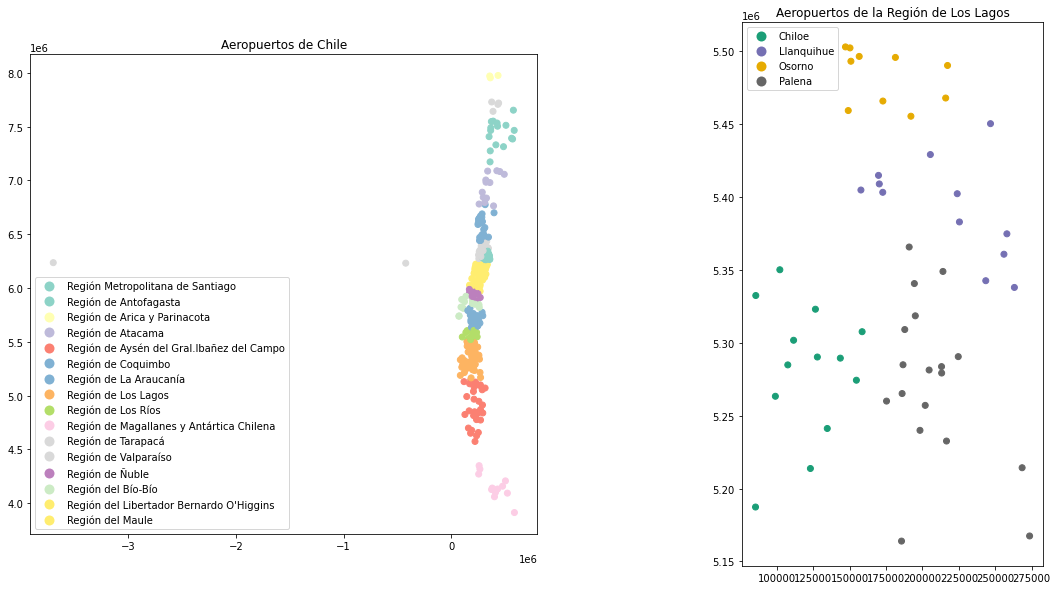

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
aeropuertos.plot(ax=ax[0], column='Region', legend=True, cmap='Set3')
ax[0].set_title('Aeropuertos de Chile')
aeropuertos[aeropuertos['Region'] == 'Región de Los Lagos'].plot(ax=ax[1], column='Provincia', legend=True, cmap='Dark2')
ax[1].set_title('Aeropuertos de la Región de Los Lagos')
plt.show()

In [33]:
aeropuertos.buffer(5000)

0      POLYGON ((329447.680 7081475.031, 329447.680 7...
1      POLYGON ((242711.318 4650999.057, 242711.318 4...
2      POLYGON ((468060.385 4152033.763, 468060.385 4...
3      POLYGON ((232747.710 5992918.694, 232747.710 6...
4      POLYGON ((271803.135 6604170.927, 271803.135 6...
                             ...                        
313    POLYGON ((-432303.624 6225319.945, -432303.624...
314    POLYGON ((147743.178 5399876.949, 147743.178 5...
315    POLYGON ((220615.644 4811907.948, 220615.644 4...
316    POLYGON ((171055.552 5514613.262, 171055.552 5...
317    POLYGON ((269518.460 6097933.195, 269518.460 6...
Length: 318, dtype: geometry

In [26]:
aeropuertos.geometry = aeropuertos.buffer(5000)

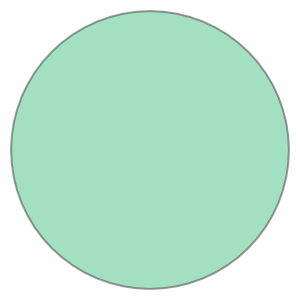

In [27]:
aeropuertos.geometry[0]

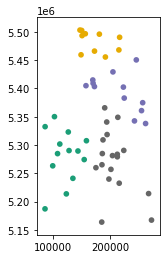

In [28]:
aeropuertos[aeropuertos['Region'] == 'Región de Los Lagos'].plot(column='Provincia', cmap='Dark2')

plt.show()

In [34]:
aeropuertos.geometry = aeropuertos.envelope

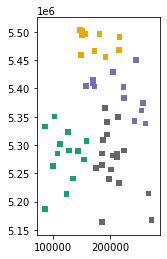

In [35]:
aeropuertos[aeropuertos['Region'] == 'Región de Los Lagos'].plot(column='Provincia', cmap='Dark2')

plt.show()

In [31]:
str(aeropuertos.geometry[0]).split(',')

['POLYGON ((334447.6797904948 7081475.031206928',
 ' 344447.6797904948 7081475.031206928',
 ' 344447.6797904948 7091475.031206928',
 ' 334447.6797904948 7091475.031206928',
 ' 334447.6797904948 7081475.031206928))']

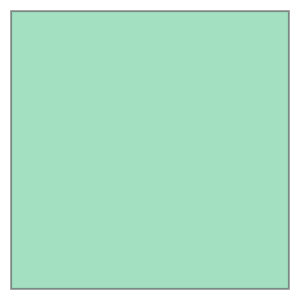

In [32]:
aeropuertos.geometry[0]

In [38]:
aeropuertos[aeropuertos['Provincia'] == 'Chañaral']

,objectid_1,cod_comuna,categoría,cod_oaci,cod_iata,Aerodromo,Region,Provincia,Comuna,geometry
0,39,3201.0,Aeródromo,SCRA,CNR,Aeródromo Chañaral,Región de Atacama,Chañaral,Chañaral,"POLYGON ((334447.680 7081475.031, 344447.680 7..."
67,41,3202.0,Aeródromo,SCES,ESR,Aeródromo Ricardo García Posada,Región de Atacama,Chañaral,Diego de Almagro,"POLYGON ((419849.859 7084566.282, 429849.859 7..."
95,542,3202.0,Aeródromo,SCEI,None,Aeródromo Potrerillos,Región de Atacama,Chañaral,Diego de Almagro,"POLYGON ((447518.068 7077125.330, 457518.068 7..."
273,40,3202.0,Aeródromo,None,None,Aeródromo La Ola,Región de Atacama,Chañaral,Diego de Almagro,"POLYGON ((488695.412 7051579.255, 498695.412 7..."


In [40]:
sum(aeropuertos['Provincia'] == 'Chañaral')

4